# Decision Trees and Random Forests

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(3)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5


- Kyphosis present after operation
- Age of child in months
- Number of vertebre operated on
- Top most vetebre operated on

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


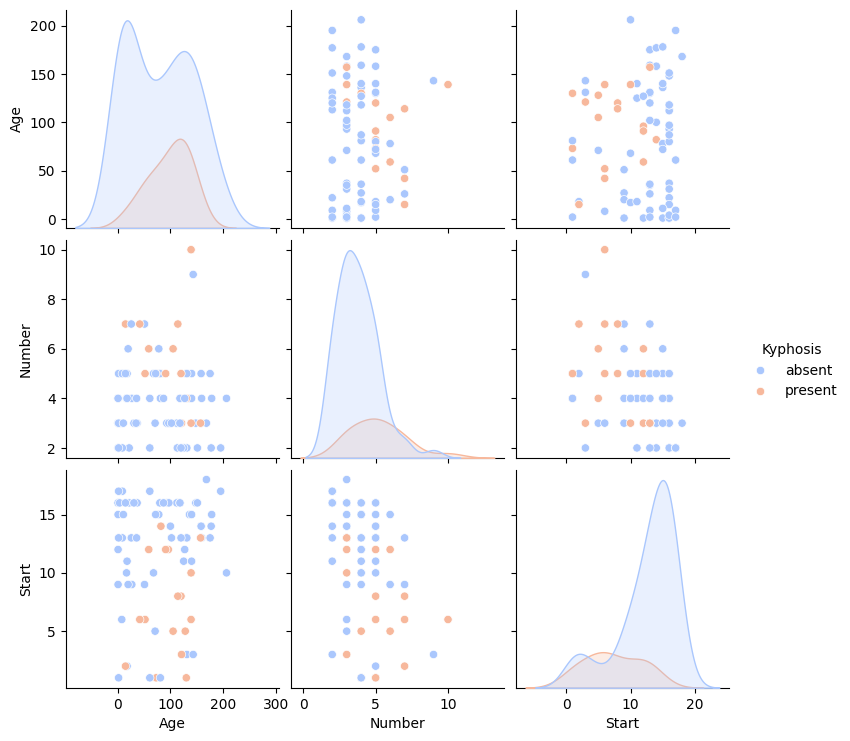

In [5]:
sns.pairplot(df, hue='Kyphosis', palette='coolwarm')

---

### ML SECTION

In [6]:
features = df.drop('Kyphosis', axis=1)
target = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
pred = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[16  2]
 [ 3  4]]
              precision    recall  f1-score   support

      absent       0.84      0.89      0.86        18
     present       0.67      0.57      0.62         7

    accuracy                           0.80        25
   macro avg       0.75      0.73      0.74        25
weighted avg       0.79      0.80      0.80        25



----

### Using Random Forest Model
Uses bootstrap (sampling from training set with replacement)
Creates onsamble of trees, where each use different splits, so that if there is a strong feature all the trees arent coralated. This takes some features out randomly, making it so when we average the veariance is lowered

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators=200)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(confusion_matrix(y_test, rfc_pred))

print(classification_report(y_test, rfc_pred))

#as dataset gets larger and larger the random forest will do better and better than decision tree

[[17  1]
 [ 5  2]]
              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

